In [1]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.3 MB/s 


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.utils import to_categorical

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [4]:
print(X_train[0])   #values are as 2 dimentional array

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print(Y_train[0])

[6]


In [6]:
class_names= ['airplane', 'automobile' , 'bird', 'cat', 'deer', 'dog', 'frog' ,'horse' ,'ship', 'truck' ]

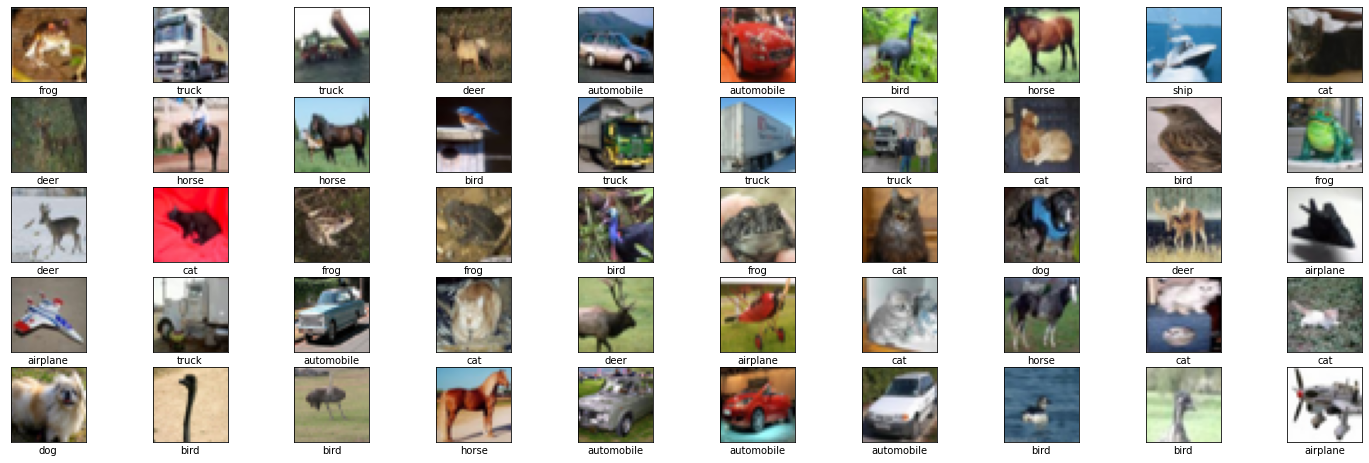

In [7]:
plt.figure(figsize=(25,8))  #setting the below frame size 
for i in range(50):
  plt.subplot(5, 10, i+1) #(nrows,ncol,arg) nrow*ncol= should be in range
  plt.imshow(X_train[i])
  plt.xticks([]) #eliminates the graph nums 
  plt.yticks([])
  plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [8]:
X_train, X_test = X_train / 255.0 , X_test / 255.0  #Scaling the RGB values from 0-255 to 0-1


In [9]:
print(X_train)   #scaled value ranges from 0 to 1
print(X_test)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

### **Model 1**

In [10]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          layers.Conv2D(filters= 32, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [11]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 20s 8ms/step - loss: 1.5576 - accuracy: 0.4369 - val_loss: 1.4780 - val_accuracy: 0.4847
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2453 - accuracy: 0.5574 - val_loss: 1.1857 - val_accuracy: 0.5819
Epoch 3/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1249 - accuracy: 0.6036 - val_loss: 1.1141 - val_accuracy: 0.6118
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0356 - accuracy: 0.6370 - val_loss: 1.0781 - val_accuracy: 0.6246
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9695 - accuracy: 0.6603 - val_loss: 1.0322 - val_accuracy: 0.6486
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9152 - accuracy: 0.6780 - val_loss: 1.0329 - val_accuracy: 0.6435
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8690 - accuracy: 0.6962 - val_loss: 0.9972 - val_accurac

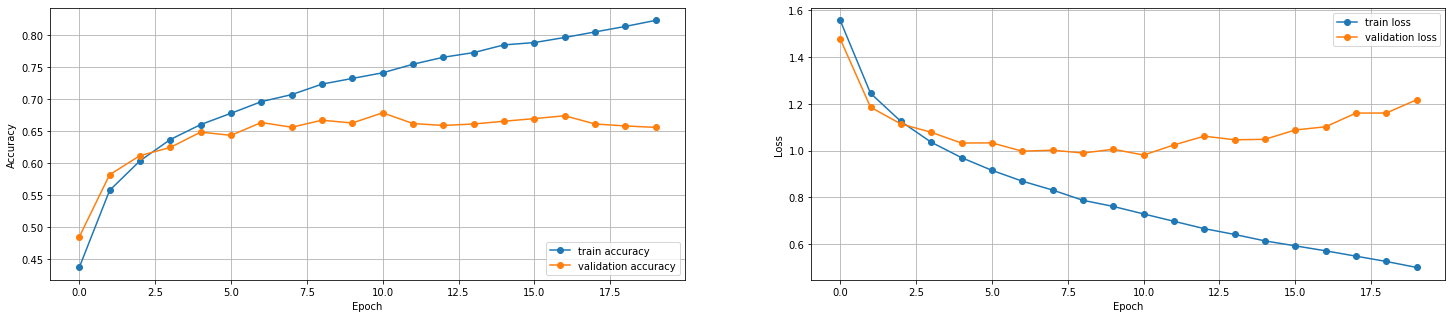

In [13]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(T.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(T.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(T.history['loss'], 'o-', label= 'train loss')
plt.plot(T.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### **Model 2**

In [14]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          layers.Conv2D(filters= 32, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,1)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.5952 - accuracy: 0.4249 - val_loss: 1.3734 - val_accuracy: 0.5098
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2770 - accuracy: 0.5459 - val_loss: 1.3185 - val_accuracy: 0.5451
Epoch 3/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1304 - accuracy: 0.5981 - val_loss: 1.1325 - val_accuracy: 0.5948
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0319 - accuracy: 0.6357 - val_loss: 1.1571 - val_accuracy: 0.5970
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9579 - accuracy: 0.6635 - val_loss: 1.1083 - val_accuracy: 0.6147
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8977 - accuracy: 0.6864 - val_loss: 1.0884 - val_accuracy: 0.6242
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8462 - accuracy: 0.7019 - val_loss: 1.1018 - val_accurac

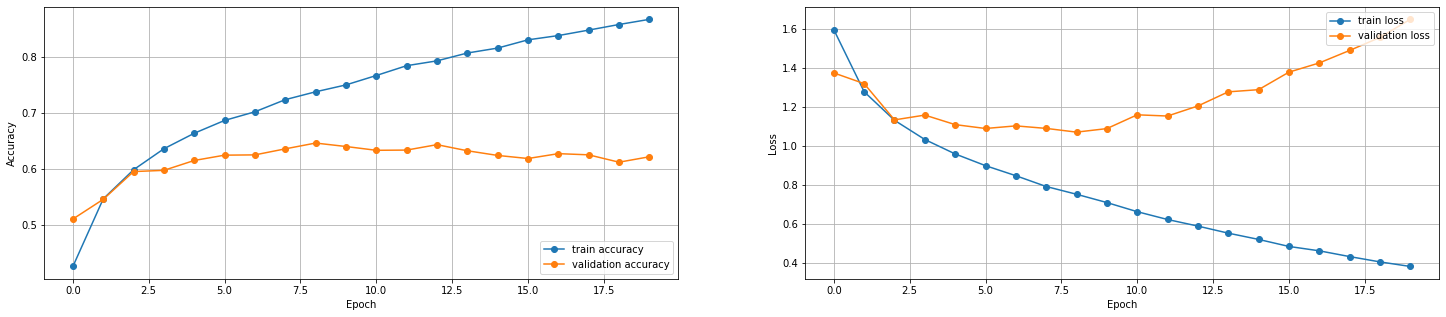

In [15]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(T.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(T.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(T.history['loss'], 'o-', label= 'train loss')
plt.plot(T.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### **Model 3**

In [16]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,1)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5869 - accuracy: 0.4260 - val_loss: 1.3769 - val_accuracy: 0.5042
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2687 - accuracy: 0.5450 - val_loss: 1.2360 - val_accuracy: 0.5625
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1253 - accuracy: 0.6033 - val_loss: 1.1426 - val_accuracy: 0.5994
Epoch 4/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0260 - accuracy: 0.6384 - val_loss: 1.1694 - val_accuracy: 0.5951
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9620 - accuracy: 0.6612 - val_loss: 1.0953 - val_accuracy: 0.6195
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9016 - accuracy: 0.6816 - val_loss: 1.0710 - val_accuracy: 0.6288
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8583 - accuracy: 0.6983 - val_loss: 1.0752 -

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.7507 - accuracy: 0.3474 - val_loss: 1.5487 - val_accuracy: 0.4430
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4374 - accuracy: 0.4759 - val_loss: 1.4379 - val_accuracy: 0.4831
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3075 - accuracy: 0.5264 - val_loss: 1.3211 - val_accuracy: 0.5281
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2212 - accuracy: 0.5619 - val_loss: 1.2365 - val_accuracy: 0.5613
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1458 - accuracy: 0.5912 - val_loss: 1.1765 - val_accuracy: 0.5840
Epoch 6/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.0990 - accuracy: 0.6118 - val_loss: 1.1873 - val_accuracy: 0.5899
Epoch 7/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.0540 - accuracy: 0.6284 - val_loss: 1.1418 - val_a

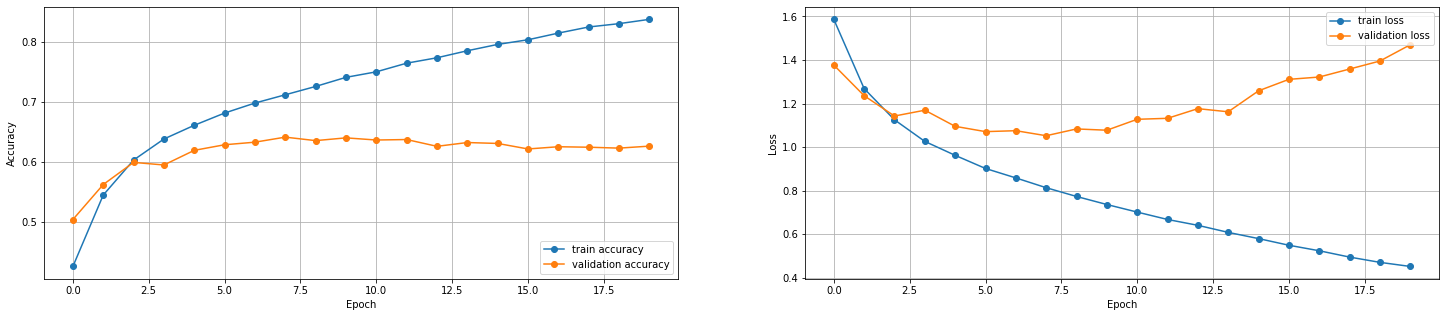

In [17]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(T.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(T.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(T.history['loss'], 'o-', label= 'train loss')
plt.plot(T.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### **Model 4**


In [18]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='SGD',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 11s 9ms/step - loss: 2.1484 - accuracy: 0.2089 - val_loss: 1.9850 - val_accuracy: 0.2781
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8716 - accuracy: 0.3190 - val_loss: 1.7581 - val_accuracy: 0.3553
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6819 - accuracy: 0.3906 - val_loss: 1.6057 - val_accuracy: 0.4121
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5714 - accuracy: 0.4291 - val_loss: 1.5251 - val_accuracy: 0.4462
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4850 - accuracy: 0.4615 - val_loss: 1.4732 - val_accuracy: 0.4704
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4171 - accuracy: 0.4854 - val_loss: 1.4178 - val_accuracy: 0.4932
Epoch 7/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.3596 - accuracy: 0.5133 - val_loss: 1.3472 - val_ac

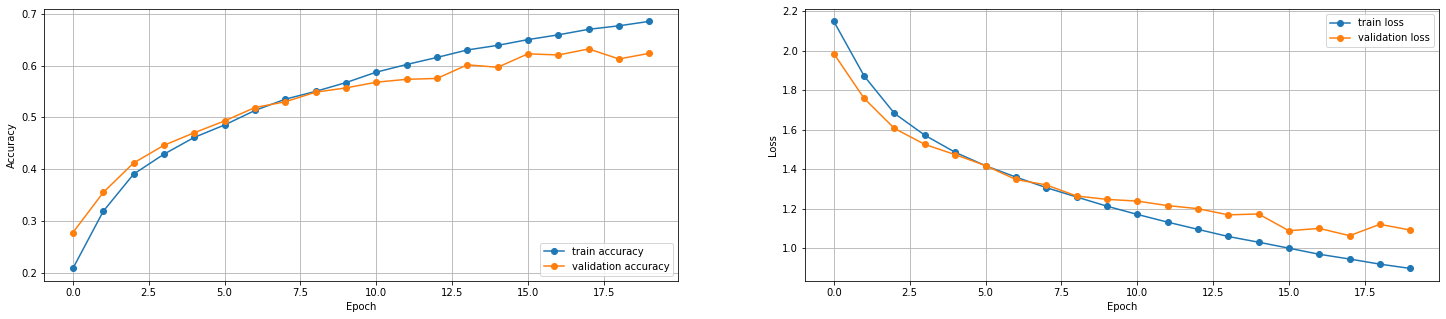

In [19]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(T.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(T.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(T.history['loss'], 'o-', label= 'train loss')
plt.plot(T.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

### **Model 5**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='RMSprop',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)


Epoch 1/20
1250/1250 [==============================] - 17s 13ms/step - loss: 1.7728 - accuracy: 0.3490 - val_loss: 1.6199 - val_accuracy: 0.4174
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4198 - accuracy: 0.4892 - val_loss: 1.3842 - val_accuracy: 0.4930
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2630 - accuracy: 0.5484 - val_loss: 1.2034 - val_accuracy: 0.5749
Epoch 4/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1597 - accuracy: 0.5927 - val_loss: 1.1446 - val_accuracy: 0.5977
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0862 - accuracy: 0.6216 - val_loss: 1.1240 - val_accuracy: 0.6066
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0244 - accuracy: 0.6431 - val_loss: 1.0860 - val_accuracy: 0.6321
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9724 - accuracy: 0.6637 - val_loss: 1.0655 -

### **Model 6**


In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='RMSprop',
    loss= 'sparse_categorical_crossentropy',                                 
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 13s 10ms/step - loss: 1.7665 - accuracy: 0.3548 - val_loss: 1.4762 - val_accuracy: 0.4674
Epoch 2/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.4083 - accuracy: 0.4959 - val_loss: 1.3591 - val_accuracy: 0.5199
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.2521 - accuracy: 0.5586 - val_loss: 1.1922 - val_accuracy: 0.5811
Epoch 4/20
1250/1250 [==============================] - 12s 9ms/step - loss: 1.1440 - accuracy: 0.6012 - val_loss: 1.1653 - val_accuracy: 0.5971
Epoch 5/20
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0623 - accuracy: 0.6305 - val_loss: 1.1309 - val_accuracy: 0.6066
Epoch 6/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9971 - accuracy: 0.6550 - val_loss: 1.0570 - val_accuracy: 0.6434
Epoch 7/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.9482 - accuracy: 0.6715 - val_loss: 1.0986 - 

In [ ]:
#Y_train = tf.one_hot(Y_train, 10)
Y_train_categorical = keras.utils.to_categorical(
    Y_train, num_classes=10, dtype= 'float32'
)


In [ ]:
Y_train_categorical[:5]          #in one hot encoded form

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
print(Y_train.shape)

(50000, 1)


In [ ]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
#Y_test = tf.one_hot(Y_test, 10)
Y_test_categorical = keras.utils.to_categorical(
    Y_test, num_classes=10, dtype= 'float32'
)


In [ ]:
Y_test_categorical[:5]   #in one hot encoded form

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### **Model 7**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='RMSprop',
    loss= 'categorical_crossentropy',                           #Softmax is the only activation function recommended to use with the categorical crossentropy loss function
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train_categorical, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 15s 11ms/step - loss: 1.7388 - accuracy: 0.3615 - val_loss: 1.4169 - val_accuracy: 0.4847
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3843 - accuracy: 0.5073 - val_loss: 1.2971 - val_accuracy: 0.5345
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2228 - accuracy: 0.5663 - val_loss: 1.2498 - val_accuracy: 0.5615
Epoch 4/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1229 - accuracy: 0.6054 - val_loss: 1.1279 - val_accuracy: 0.6097
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0442 - accuracy: 0.6356 - val_loss: 1.0729 - val_accuracy: 0.6309
Epoch 6/20
1250/1250 [==============================] - 14s 12ms/step - loss: 0.9843 - accuracy: 0.6590 - val_loss: 1.1287 - val_accuracy: 0.6075
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9347 - accuracy: 0.6756 - val_loss: 1.0860 -

### **Model 8**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='RMSprop',
    loss= 'categorical_crossentropy',                           #Softmax is the only activation function recommended to use with the categorical crossentropy loss function
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train_categorical, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 15s 11ms/step - loss: 1.7683 - accuracy: 0.3519 - val_loss: 1.5090 - val_accuracy: 0.4631
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.4033 - accuracy: 0.4975 - val_loss: 1.3678 - val_accuracy: 0.5146
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2579 - accuracy: 0.5579 - val_loss: 1.2811 - val_accuracy: 0.5481
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1653 - accuracy: 0.5925 - val_loss: 1.2047 - val_accuracy: 0.5723
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0946 - accuracy: 0.6166 - val_loss: 1.1624 - val_accuracy: 0.5967
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0342 - accuracy: 0.6394 - val_loss: 1.0913 - val_accuracy: 0.6241
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 0.9878 - accuracy: 0.6551 - val_loss: 1.0669 -

### **Model 9**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='RMSprop',
    loss= 'kullback_leibler_divergence',                           #Softmax is the only activation function recommended to use with the categorical crossentropy loss function
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train_categorical, epochs=20,validation_split= 0.2, batch_size= 32)

Epoch 1/20
1250/1250 [==============================] - 14s 10ms/step - loss: 0.0020 - accuracy: 0.1019 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 2/20
1250/1250 [==============================] - 13s 10ms/step - loss: -1.4506e-05 - accuracy: 0.0997 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 3/20
1250/1250 [==============================] - 13s 10ms/step - loss: -1.4506e-05 - accuracy: 0.0997 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 4/20
1250/1250 [==============================] - 13s 10ms/step - loss: -1.4506e-05 - accuracy: 0.0997 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 5/20
1250/1250 [==============================] - 13s 10ms/step - loss: -1.4506e-05 - accuracy: 0.0997 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 6/20
1250/1250 [==============================] - 13s 10ms/step - loss: -1.4506e-05 - accuracy: 0.0997 - val_loss: -1.4506e-05 - val_accuracy: 0.1014
Epoch 7/20
1250/1250 [==============================] - 13s 10ms/step

### **Model 10**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),

                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='softmax')

])

model.compile(
    optimizer='RMSprop',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train, epochs=60,validation_split= 0.2, batch_size= 32)


Epoch 1/60
1250/1250 [==============================] - 15s 11ms/step - loss: 1.7444 - accuracy: 0.3622 - val_loss: 1.5184 - val_accuracy: 0.4601
Epoch 2/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3993 - accuracy: 0.5005 - val_loss: 1.3945 - val_accuracy: 0.5072
Epoch 3/60
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2593 - accuracy: 0.5550 - val_loss: 1.2376 - val_accuracy: 0.5623
Epoch 4/60
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1677 - accuracy: 0.5930 - val_loss: 1.1458 - val_accuracy: 0.6023
Epoch 5/60
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0919 - accuracy: 0.6176 - val_loss: 1.1319 - val_accuracy: 0.6058
Epoch 6/60
1250/1250 [==============================] - 13s 10ms/step - loss: 1.0375 - accuracy: 0.6361 - val_loss: 1.0632 - val_accuracy: 0.6365
Epoch 7/60
1250/1250 [==============================] - 13s 10ms/step - loss: 0.9879 - accuracy: 0.6543 - val_loss: 1.1880 -

### **Model 11**

In [ ]:
model = keras.Sequential([
                          
                          keras.Input(shape=(32,32,3)),

                          
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 64, kernel_size= (5,5), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size = (2,2)),
                          
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),

                          layers.Dense(10, activation='sigmoid')

])

model.compile(
    optimizer='RMSprop',
    loss= 'categorical_crossentropy',                           #Softmax is the only activation function recommended to use with the categorical crossentropy loss function
    metrics=['accuracy']
)

T = model.fit(x=X_train, y=Y_train_categorical, epochs=100,validation_split= 0.2, batch_size= 32)

Epoch 1/100
1250/1250 [==============================] - 16s 12ms/step - loss: 1.7595 - accuracy: 0.3559 - val_loss: 1.4652 - val_accuracy: 0.4726
Epoch 2/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4089 - accuracy: 0.4934 - val_loss: 1.3716 - val_accuracy: 0.5174
Epoch 3/100
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2597 - accuracy: 0.5545 - val_loss: 1.2421 - val_accuracy: 0.5620
Epoch 4/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.1566 - accuracy: 0.5914 - val_loss: 1.4023 - val_accuracy: 0.5270
Epoch 5/100
1250/1250 [==============================] - 14s 12ms/step - loss: 1.0788 - accuracy: 0.6199 - val_loss: 1.2123 - val_accuracy: 0.5907
Epoch 6/100
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0219 - accuracy: 0.6428 - val_loss: 1.0850 - val_accuracy: 0.6292
Epoch 7/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9656 - accuracy: 0.6625 - val_loss: 1

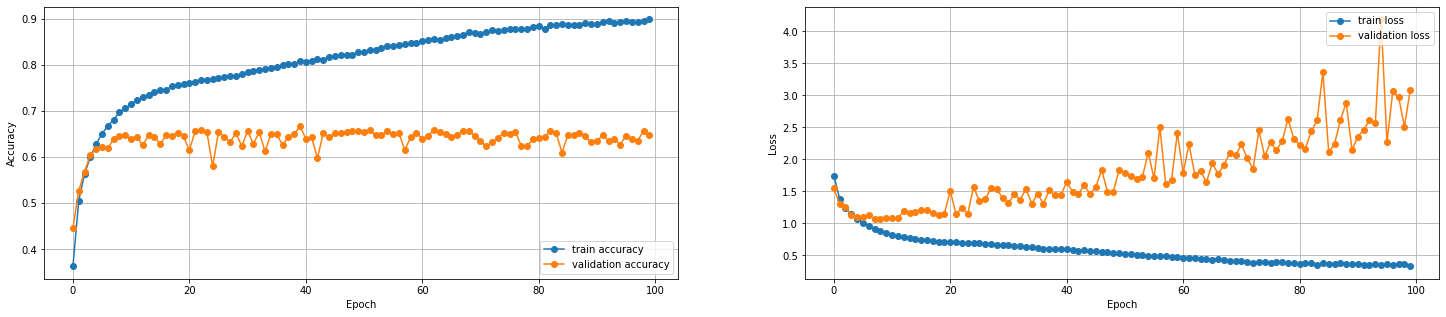

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(T.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(T.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(T.history['loss'], 'o-', label= 'train loss')
plt.plot(T.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
X_test = keras.utils.to_categorical(
    X_test, num_classes=10, dtype= 'float32'
)


In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[0]


In [ ]:
np.argmax(predictions[0])

### **Model 12 - keras Tuner**


In [20]:
def cnn_model(hp):
  model = keras.Sequential([
                            
                            keras.layers.Conv2D(
                              filters = hp.Int('conv_1_filter', min_value=32, max_value=128, step = 16),
                              kernel_size = hp.Choice('conv_1_kernel', values = [3,5]),
                              activation = 'relu',
                              input_shape = (32,32,3) 
                            ),

                            keras.layers.Conv2D(
                              filters = hp.Int('conv_2_filter', min_value=32, max_value=64, step = 16),
                              kernel_size = hp.Choice('conv_2_kernel', values = [3,5]),
                              activation = 'relu',
                            ),
                          
                          layers.Flatten(),
                          layers.Dense(
                              units= hp.Int('dense_1_units',min_value=32, max_value=128,step=16),
                                            activation='relu'
                                            ),

                          layers.Dense(10, activation='softmax')

  ])

  model.compile(optimizer= keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
    loss= 'sparse_categorical_crossentropy',                         
    metrics=['accuracy'])

  return model


In [21]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [22]:
tuner_search= RandomSearch(cnn_model,
                           objective='val_accuracy',
                           max_trials=5,directory='Colab_Notebooks',project_name="Cifer-10")

In [23]:
tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.10580000281333923

Best val_accuracy So Far: 0.10580000281333923
Total elapsed time: 00h 06m 25s
INFO:tensorflow:Oracle triggered exit


In [24]:
model = tuner_search.get_best_models(num_models=1)[0]

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 48)                1204272   
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,225,018
Trainable params: 1,225,018
Non-trainable params: 0
_________________________________________________________________


In [29]:
cnn= model.fit(X_train, Y_train, epochs = 10, validation_split=0.1, initial_epoch = 3) #retraining the images according to the got best model

Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 2.3040 - accuracy: 0.1017 - val_loss: 2.3039 - val_accuracy: 0.1024
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3040 - accuracy: 0.0987 - val_loss: 2.3040 - val_accuracy: 0.0976
Epoch 6/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3041 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1058
Epoch 7/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3041 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.0976
Epoch 8/10
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3039 - accuracy: 0.1004 - val_loss: 2.3041 - val_accuracy: 0.0986
Epoch 9/10
1407/1407 [==============================] - 13s 9ms/step - loss: 2.3041 - accuracy: 0.0978 - val_loss: 2.3042 - val_accuracy: 0.1024
Epoch 10/10
1407/1407 [==============================] - 14s 10ms/step - loss: 2.3039 - accuracy: 0.1014 - val_loss: 2.3043 - v

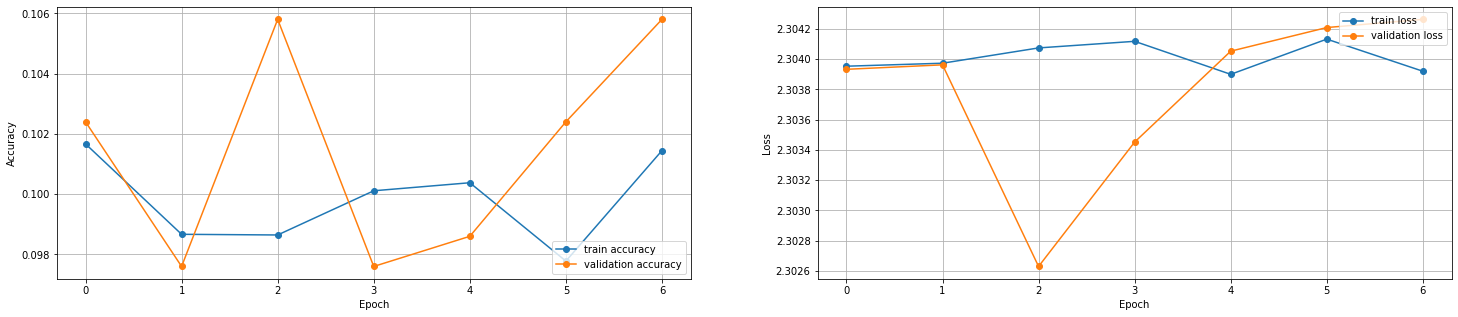

In [30]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(cnn.history['accuracy'], 'o-', label= 'train accuracy')
plt.plot(cnn.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(cnn.history['loss'], 'o-', label= 'train loss')
plt.plot(cnn.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()